In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
import mpld3
import umap
import sklearn
from sklearn.manifold import TSNE

%matplotlib inline 
mpld3.enable_notebook()

def load_data(directory):
    data = []
    for file in os.listdir(directory):
        data.append(np.load(directory+"/"+file))
    data = np.array(data)
    return data

weird_points = [1781, 536, 1145, 533, 1720, 1328, 1156, 722, 904, 360, 124, 842, 1859, 2496, 392, 1038, 947, 2322, 156, 2138, 193, 2140, 572, 1414]
def plot_lc(emedded_mat, title):
    x = emedded_mat[:, 0]
    y = emedded_mat[:, 1]
    fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')
    N = len(x)
    hehe = []
    s = []
    for i in range(N):
        if i in weird_points:
            hehe.append(2)
            s.append(30)
        else:
            hehe.append(0)
            s.append(1)
        
    hehe = np.array(hehe)
    s = np.array(s)
    scatter = ax.scatter(x,
                         y,
                         c=hehe,
                         s=s,
                         alpha=0.3)
    ax.grid(color='white', linestyle='solid')

    ax.set_title(title, size=15)

    labels = ['point {0}'.format(i + 1) for i in range(N)]
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
    mpld3.plugins.connect(fig, tooltip)


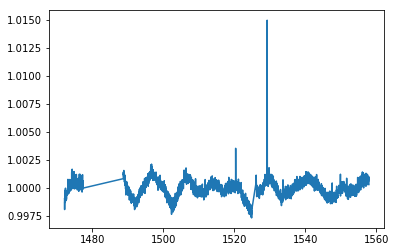

In [15]:
kdata = np.load('KeplerSampleFullQ.npy',encoding='bytes')
def real_plot(num):
    x = kdata[num][0]
    y = kdata[num][1]
    plt.plot(x, y)
    plt.show()
real_plot(9)

In [16]:
data = load_data("true_points")
reshaped_data = data.reshape(2500, 784)

1.04691183567
999


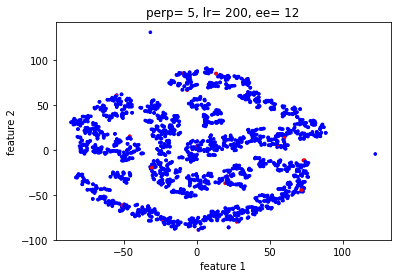

0.675539970398
999


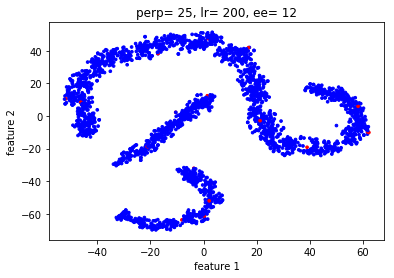

0.461405545473
999


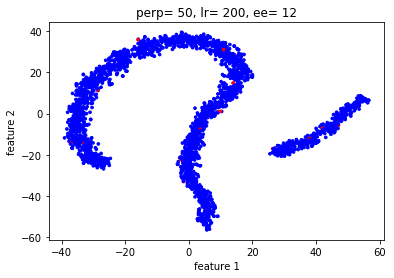

0.289957940578
999


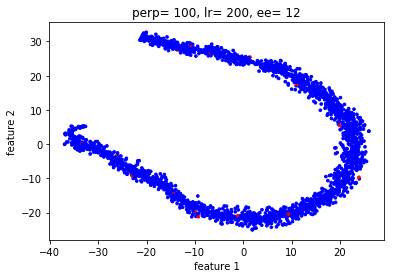

In [24]:
lr = 200
ee = 12
for p in [5, 25, 50, 100]:
    model = TSNE(n_components=2, perplexity=p, early_exaggeration=ee, learning_rate=lr)
    embeddings = model.fit_transform(reshaped_data)
    print model.kl_divergence_
    print model.n_iter_
    x = embeddings[:, 0]
    y = embeddings[:, 1]
    colors = ['b' if i not in weird_points else 'r' for i, _ in enumerate(reshaped_data)]
    plt.title("perp= " + str(p) + ", lr= " +str(lr) + ", ee= " + str(ee))
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.scatter(x, y, c=colors, s=7)
    plt.show()
    

0.515570700169
999


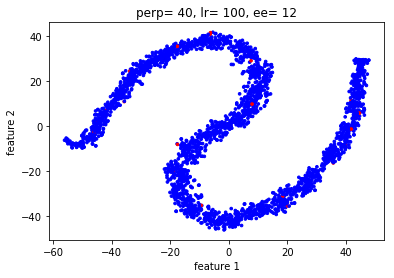

0.517597138882
999


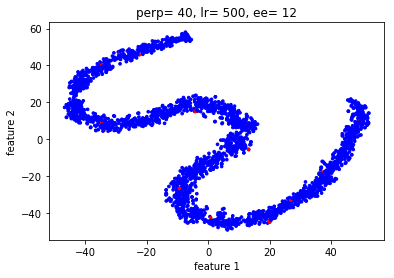

0.514637708664
999


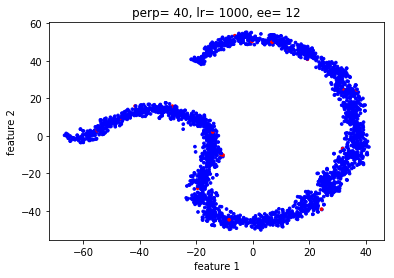

0.529564261436
999


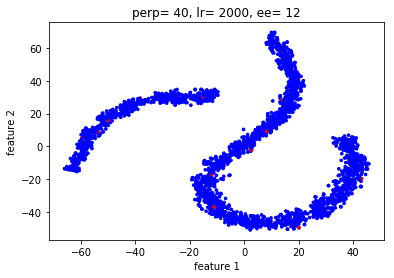

In [25]:
ee = 12
p = 40
for lr in [100, 500, 1000, 2000]:
    model = TSNE(n_components=2, perplexity=p, early_exaggeration=ee, learning_rate=lr)
    embeddings = model.fit_transform(reshaped_data)
    print model.kl_divergence_
    print model.n_iter_
    x = embeddings[:, 0]
    y = embeddings[:, 1]
    colors = ['b' if i not in weird_points else 'r' for i, _ in enumerate(reshaped_data)]
    plt.title("perp= " + str(p) + ", lr= " +str(lr) + ", ee= " + str(ee))
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.scatter(x, y, c=colors, s=7)
    plt.show()

0.554739952087
999


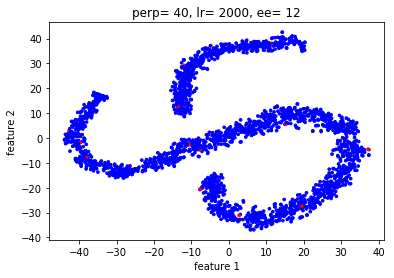

In [26]:
model = TSNE(n_components=2, perplexity=p, early_exaggeration=ee, learning_rate=20)
embeddings = model.fit_transform(reshaped_data)
print model.kl_divergence_
print model.n_iter_
x = embeddings[:, 0]
y = embeddings[:, 1]
colors = ['b' if i not in weird_points else 'r' for i, _ in enumerate(reshaped_data)]
plt.title("perp= " + str(p) + ", lr= " +str(lr) + ", ee= " + str(ee))
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.scatter(x, y, c=colors, s=7)
plt.show()

0.586213767529
999


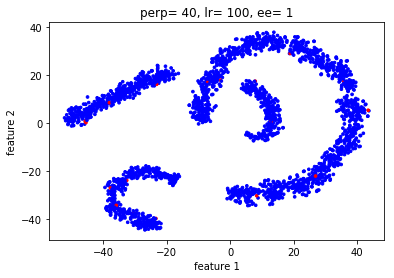

0.515736043453
999


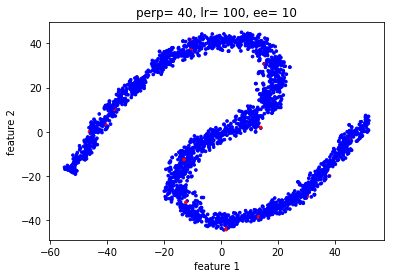

0.529781162739
999


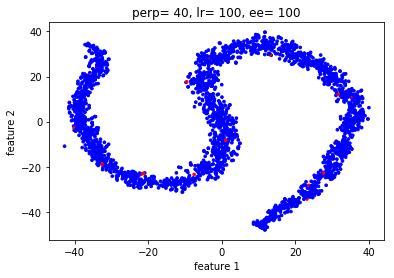

0.716164767742
999


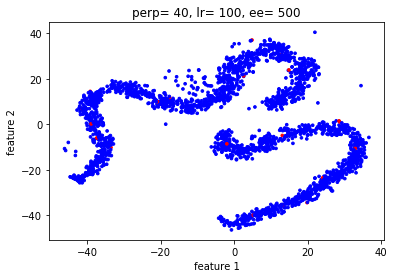

0.814502000809
999


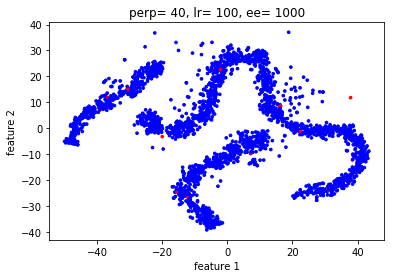

In [27]:
p = 40
lr = 100
for ee in [1, 10, 100, 500, 1000]:
    model = TSNE(n_components=2, perplexity=p, early_exaggeration=ee, learning_rate=lr)
    embeddings = model.fit_transform(reshaped_data)
    print model.kl_divergence_
    print model.n_iter_
    x = embeddings[:, 0]
    y = embeddings[:, 1]
    colors = ['b' if i not in weird_points else 'r' for i, _ in enumerate(reshaped_data)]
    plt.title("perp= " + str(p) + ", lr= " +str(lr) + ", ee= " + str(ee))
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.scatter(x, y, c=colors, s=7)
    plt.show()